In [1]:
import os
import pandas as pd
import numpy as np
import shelve
from itertools import chain
from collections import defaultdict, Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
os.chdir("/home/gstupp/projects/Wolan/cmoon/CM7_CM1E2d56col_unenr123_rawextract_2017/out")

In [3]:
def to_percent(y, position):
    s = str(100 * y)
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

In [4]:
def main(rank):
    df_pivot = pd.read_csv("{}_count_pivot.csv".format(rank), index_col=0)
    # remove columns we dont want
    columns_keep = df_pivot.columns[~df_pivot.columns.isin(['muridae', 'poaceae', 'hominidae', 'chordata', 'streptophyta'])]
    df_pivot = df_pivot[columns_keep]

    # average replicates together
    df_pivot = df_pivot.T
    df_pivot['RT'] = df_pivot[['RTsep_unenr1', 'RTsep_unenr2', 'RTsep_unenr3']].mean(axis=1)
    df_pivot['Rag'] = df_pivot[['Ragsep_unenr1', 'Ragsep_unenr2', 'Ragsep_unenr3']].mean(axis=1)
    df_pivot['WT'] = df_pivot[['WTsep_unenr1', 'WTsep_unenr2', 'WTsep_unenr3']].mean(axis=1)
    df_pivot = df_pivot[['RT', 'Rag', 'WT']]
    df_pivot = df_pivot.T

    # normalize, merge everything less than 2% into "other"
    df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
    df_pivot = df_pivot[df_pivot.columns[df_pivot.sum()>0.02]]
    df_pivot = df_pivot[df_pivot.sum().sort_values().index]
    other = pd.Series(1-df_pivot.sum(axis=1), name = "Other")
    df_pivot['other'] = other
    df_pivot = df_pivot[[-1]+list(range(len(df_pivot.columns)-1))]
    return df_pivot

In [5]:
def plot(df_pivot):
    f = plt.figure(figsize=(12*1.25,8*1.25))
    matplotlib.style.use('ggplot')
    ax = df_pivot.plot.bar(stacked=True, legend = 'reverse', ylim=(0,1), ax=f.gca())
    lgd = plt.legend()
    handles, labels = ax.get_legend_handles_labels()
    lgd = plt.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_ylabel("Normalized Count")
    ax.title.set_fontsize(20)
    formatter = FuncFormatter(to_percent)
    plt.gca().yaxis.set_major_formatter(formatter)
    f.subplots_adjust(right=0.8)
    plt.savefig("{}_count_RT_rag_wtsep.pdf".format(rank), bbox_inches='tight')
    plt.show()

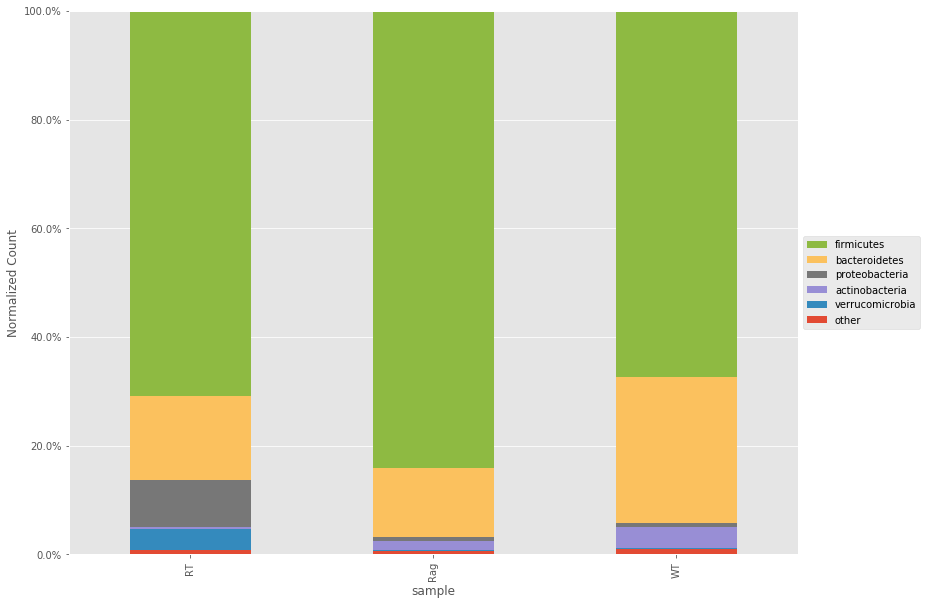

In [6]:
rank = "phylum"
df_pivot = main(rank)
df_pivot.to_csv("{}_count_pivot_RT_Rag_WTsep.csv".format(rank))
plot(df_pivot)

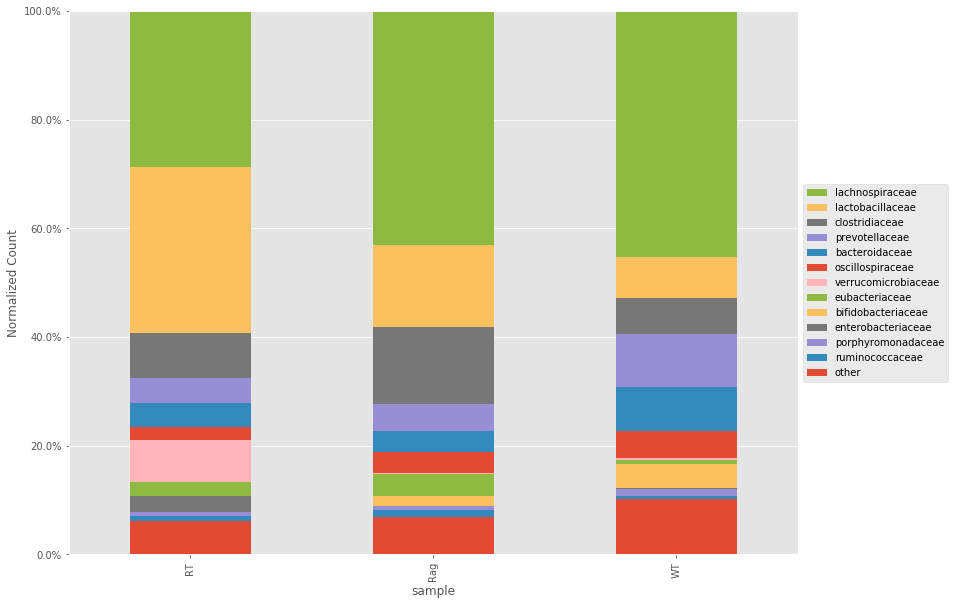

In [7]:
rank = "family"
df_pivot = main(rank)
df_pivot.to_csv("{}_count_pivot_RT_Rag_WTsep.csv".format(rank))
plot(df_pivot)